# 회귀 알고리즘과 모델 규제

## k-최근접 이웃 회귀

### k-최근접 이웃 회귀

회귀
- 두 변수 사이의 상관관계를 분석하는 방법

- 임의의 어떤 숫자를 예측하는 문제

k-최근접 이웃 분류
1. 예측하려는 샘플에 가장 가까운 샘플 k개를 선택

2. 이 샘플들의 클래스를 확인하여 다수 클래스를 새로운 샘플의 클래스로 예측

k-최근접 이웃 회귀
1. 예축하려는 샘플에 가장 가까운 샘플 k개 선택          
    -> 이웃한 샘플의 타깃은 어떤 클래스가 아니라 임의의 수치
    
2. 수치들의 평균 구하기

### 데이터 준비

In [2]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

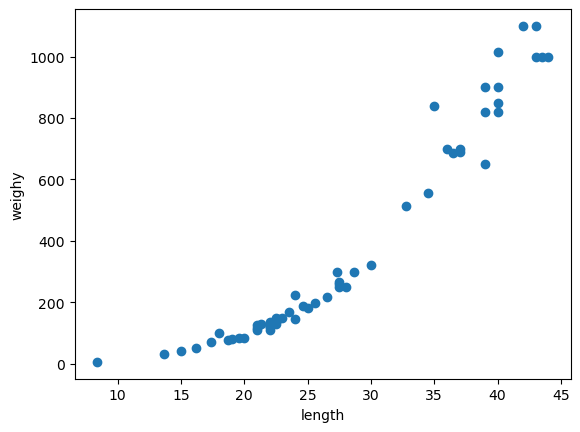

In [3]:
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weighy')
plt.show()

In [6]:
# 훈련 세트 테스트 세트 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state = 42
)

In [7]:
test_array = np.array([1, 2, 3, 4])
print(test_array.shape)

(4,)


reshape()
- 넘파이 배열의 크기를 바꿀 수 있는 메서드

- 크기가 바뀐 새로운 배열을 반환할 때 지정한 크기가 원본 배열에 있는 원소의 개수가 다르면 에러가 발생

In [ ]:
# test_array를 (2, 2) 크기로 변경
test_array = test_array.reshape(2, 2)
print(test_array.shape)

In [8]:
train_input = train_input.reshape(-1, 1) # 첫 번째 크기를 나머지 원소 개수로 채우고, 두 번쨰 크기를 1
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


### 결정계수(R^2)

In [9]:
# 객체 생성 & 회귀 모델 훈련
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

# k-최근접 이웃 회귀 모델 훈련
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [11]:
print(knr.score(test_input, test_target))

0.992809406101064


결정계수(coefficient of determination; R^2)
- 독립 변수가 종속 변수를 얼마나 잘 설명하는지
- 정답을 맞힌 개수의 비율(0~1)

- 1 - (타깃 - 평균)^2의 합 / (타깃 - 예측)^2의 합

score() 메서드
- 출력값이 높을수록 좋은 것

- 만약 score() 메서드가 에러율을 반환한다면 이를 음수로 만들어 실제로는 낮은 에러가 score() 메서드로 반환될 때는 높은 값이 되도록 바꿈

- 사이킷런은 sklearn.metrics 패키지 아래 여러 가지 측정 도구를 제공


mean_absolute_error
- 타깃과 예측의 절댓값 오차를 평균하여 반환

In [12]:
from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측
test_prediction = knr.predict(test_input)

# 테스트 세트에 대한 평균 절댓값 오차 계산
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


### 과대적합 vs 과소적합

In [13]:
print(knr.score(train_input, train_target))

0.9698823289099254


과대적합(overfitting)
- 훈련 세트에서 점수다 좋았는데 테스트 세트에서는 점수가 나쁨

- 훈련 세트에만 잘 맞는 모델이라 테스트 세트와 나중에 실전에 투입하여 새로운 샘플에 대한 예측을 만들 때 잘 동작x

과소적합(underfitting)
- 훈련 세트보다 테스트 세트의 점수가 높거나 두 점수가 모두 다 낮음

- 모델이 너무 단순하여 훈련 세트에 적절히 훈련되지 x
- 훈련 세트와 테스트 세트의 크기가 작아서 발생

과대적합 -> 훈련 세트와 테스트 세트의 점수를 배교했을 때 훈련 세트가 너무 높음

과소적합 -> 그 반대이거나 두 점수가 모두 너무 낮음

In [14]:
# 이웃의 개수를 3으로 설정(원래 기본값은 5)
knr.n_neighbors = 3

# 모델을 다시 훈련
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


In [15]:
print(knr.score(test_input, test_target))

0.9746459963987609
